In [1]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_b"](checkpoint=r"C:\Users\admin\Downloads\sam_vit_b_01ec64.pth")


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [25]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [66]:
image = cv2.imread(r"C:\Users\admin\Desktop\dress recognition\clothes-dataset.v2-2022-12-03-7-51pm.clip\train\short-sleeve\short-sleeve-t-shirt73_jpg.rf.158662e99ee9bf021cf7b3749012da17.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

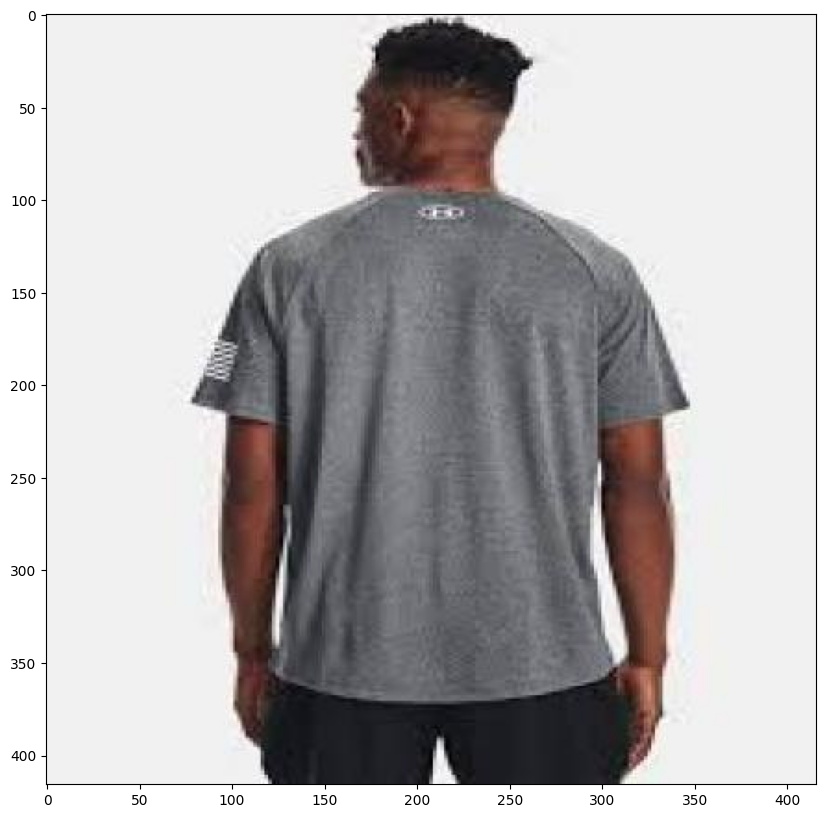

In [67]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [68]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = r"C:\Users\admin\Downloads\sam_vit_l_0b3195.pth"
model_type = "vit_l"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [69]:
masks = mask_generator.generate(image)


In [70]:
print(len(masks))
print(masks[0].keys())

19
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


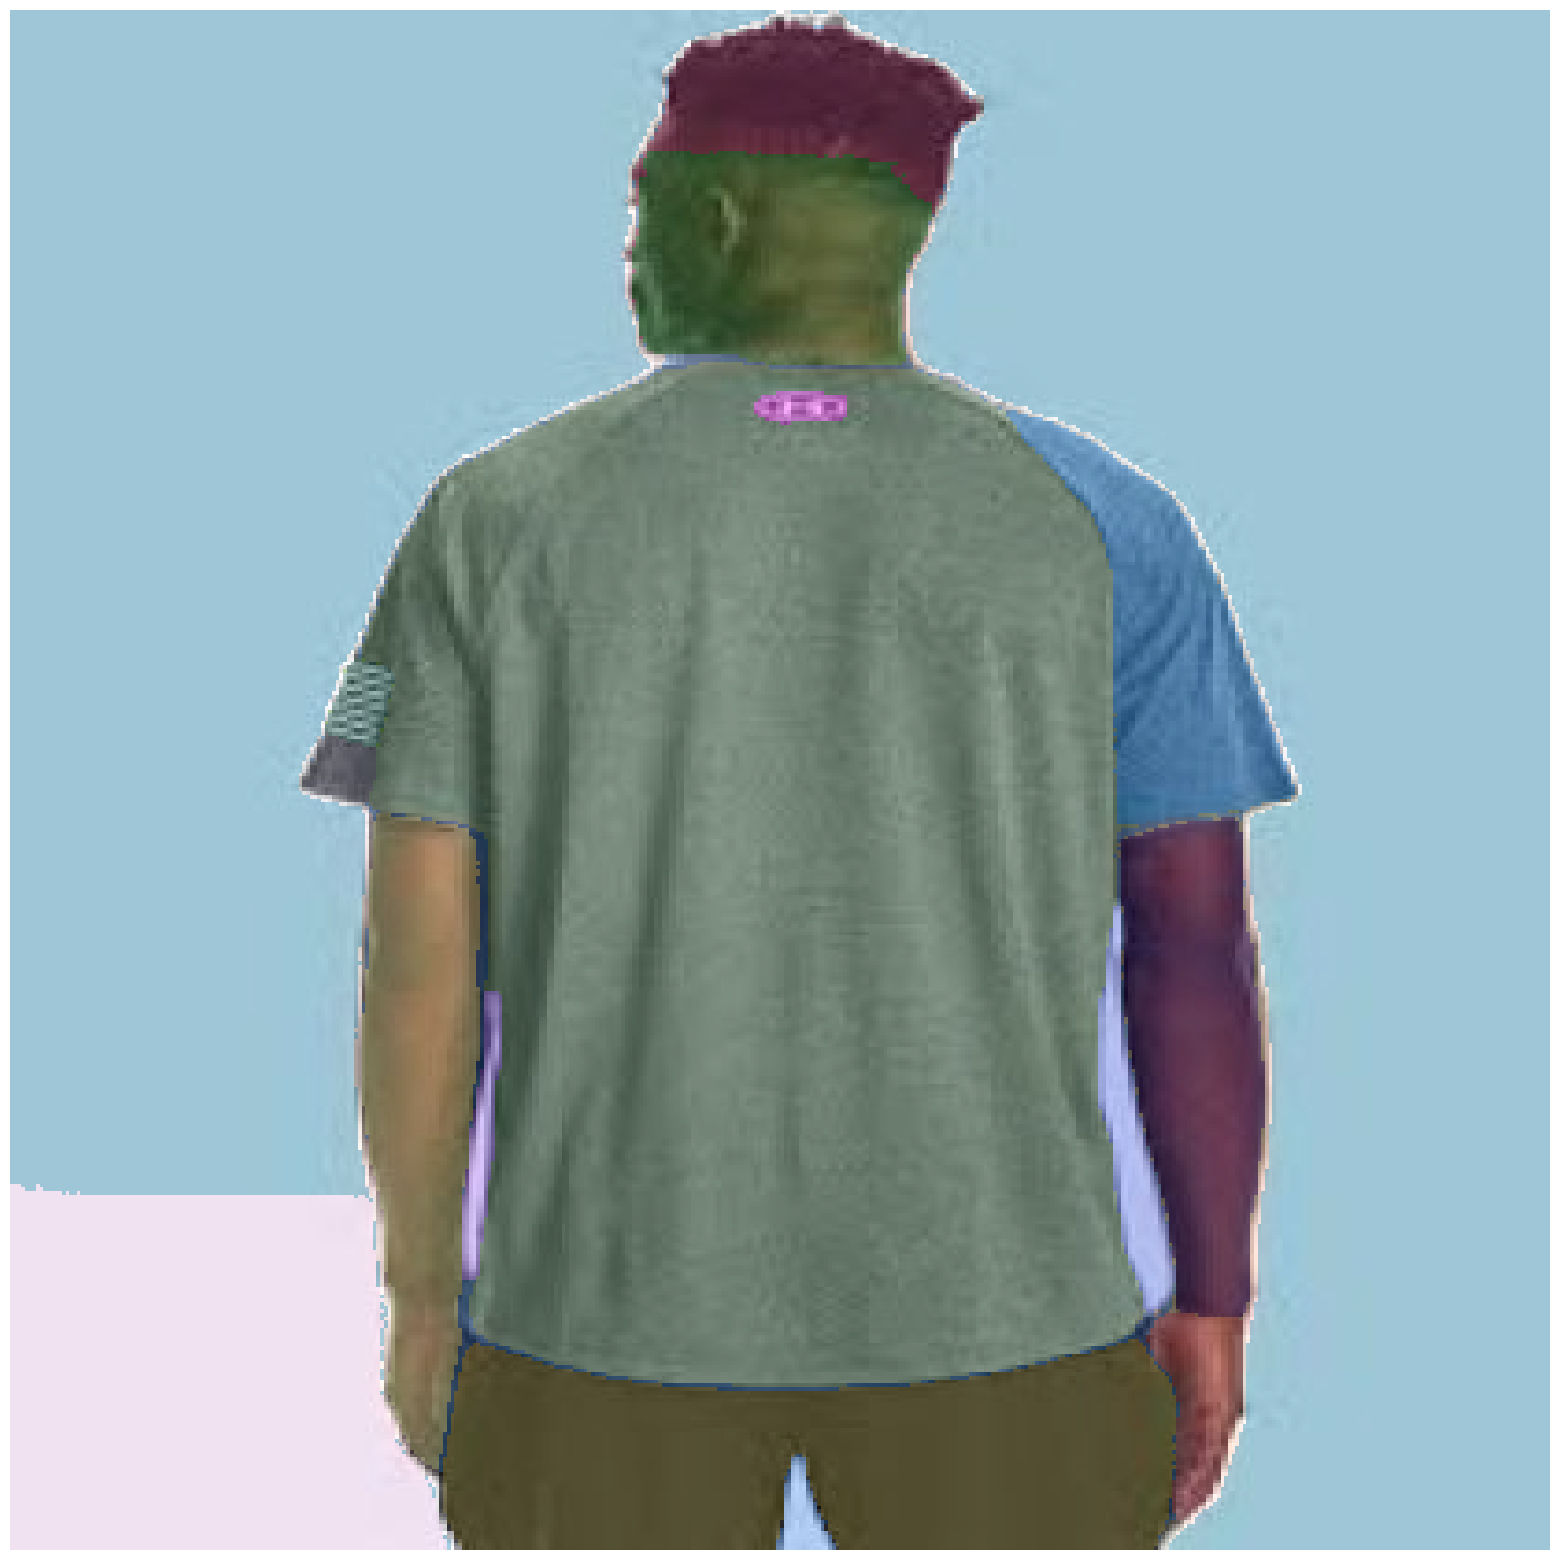

In [78]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 